# cutoff

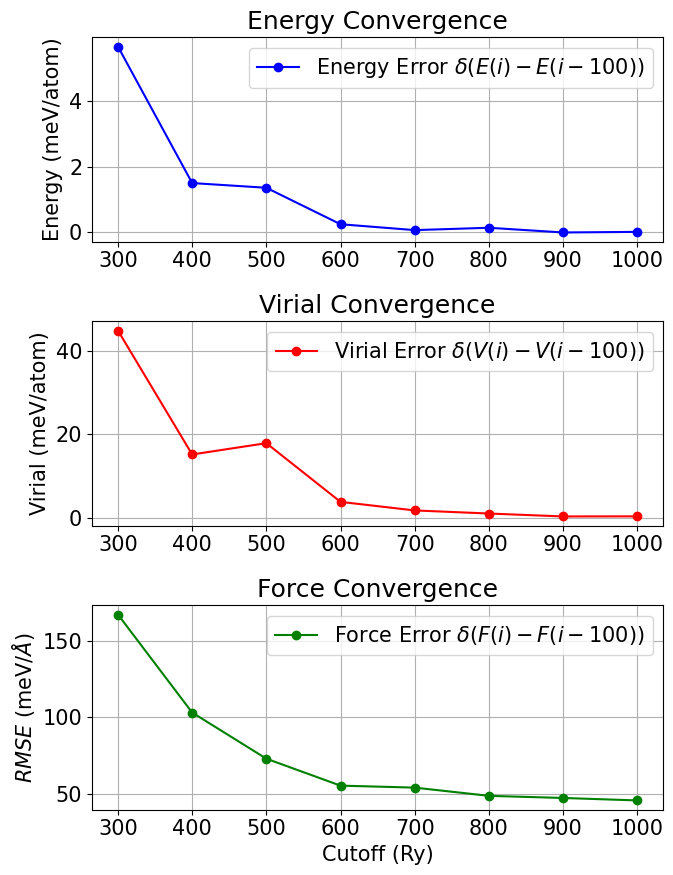

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Sans-Serif"
plt.rcParams["font.size"] = 15

# 从CSV读取数据
data = pd.read_csv('00_cp2k_cutoff_convg.dat')

# 从数据中提取值
cutoff_list = data['cutoff(Ry)'].values
energy_errors = data['energy_error(meV/atom)'].values
virial_errors = data['virial_error(meV/atom)'].values
rmse_values = data['force_rmse(meV/A)'].values

# 绘图
fig, axs = plt.subplots(3, 1, figsize=(7, 9))

# Energy图
axs[0].plot(cutoff_list, -energy_errors, '-o', color='b', label='Energy Error $\delta(E(i)-E(i-100))$')
# axs[0].set_xlabel('Cutoff (Ry)')
axs[0].set_ylabel('Energy (meV/atom)')
axs[0].legend()
axs[0].grid(True)
axs[0].set_title('Energy Convergence')

# Virial图
axs[1].plot(cutoff_list, virial_errors, '-o', color='r', label='Virial Error $\delta(V(i)-V(i-100))$')
# axs[1].set_xlabel('Cutoff (Ry)')
axs[1].set_ylabel('Virial (meV/atom)')
axs[1].legend()
axs[1].grid(True)
axs[1].set_title('Virial Convergence')

# Force图
axs[2].plot(cutoff_list, rmse_values, '-o', color='g', label='Force Error $\delta(F(i)-F(i-100))$')
axs[2].set_xlabel('Cutoff (Ry)')
axs[2].set_ylabel('$RMSE$ (meV/${\AA}$)')
axs[2].legend()
axs[2].grid(True)
axs[2].set_title('Force Convergence')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()
fig.savefig('00_cp2k_cutoff_plot.svg', format='svg',transparent=True)

# cp2k_rel_cut

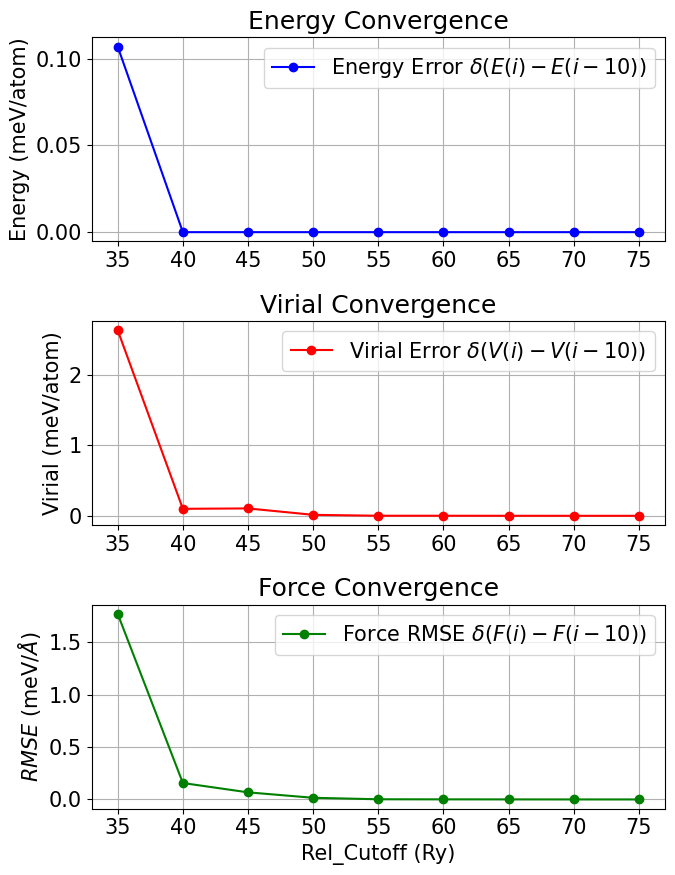

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = "Sans-Serif"
# plt.rcParams["font.size"] = 14

# 从CSV读取数据
data = pd.read_csv('01_cp2k_rel_cutoff_convg.dat')

# 从数据中提取值
rel_cutoff_list = data['rel_cutoff(Ry)'].values
energy_errors = data['energy_error(meV/atom)'].values
virial_errors = data['virial_error(meV/atom)'].values
rmse_values = data['force_rmse(meV/A)'].values

# 绘图
fig, axs = plt.subplots(3, 1, figsize=(7,9))

# Energy图
axs[0].plot(rel_cutoff_list, -energy_errors, '-o', color='b', label='Energy Error $\delta(E(i)-E(i-10))$')
# axs[0].set_xlabel('Cutoff (Ry)')
axs[0].set_ylabel('Energy (meV/atom)')
axs[0].legend()
axs[0].grid(True)
axs[0].set_title('Energy Convergence')

# Virial图
axs[1].plot(rel_cutoff_list, virial_errors, '-o', color='r', label='Virial Error $\delta(V(i)-V(i-10))$')
# axs[1].set_xlabel('Cutoff (Ry)')
axs[1].set_ylabel('Virial (meV/atom)')
axs[1].legend()
axs[1].grid(True)
axs[1].set_title('Virial Convergence')

# Force图
axs[2].plot(rel_cutoff_list, rmse_values, '-o', color='g', label='Force RMSE $\delta(F(i)-F(i-10))$')
axs[2].set_xlabel('Rel_Cutoff (Ry)')
axs[2].set_ylabel('$RMSE$ (meV/${\AA}$)')
axs[2].legend()
axs[2].grid(True)
axs[2].set_title('Force Convergence')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()
fig.savefig('01_cp2k_rel_cutoff_plot.svg', format='svg',transparent=True)

# locality

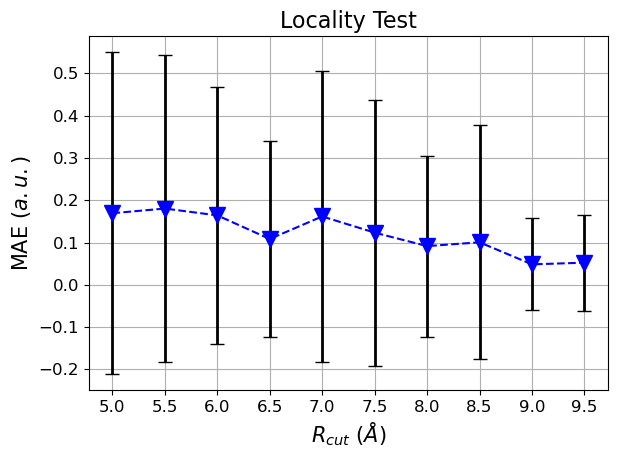

5.0: 0.16941327 0.38032442
5.5: 0.18049249 0.36197096
6.0: 0.1643112 0.30441004
6.5: 0.108483836 0.2326367
7.0: 0.16181335 0.3448731
7.5: 0.12352377 0.31424767
8.0: 0.09165218 0.21416083
8.5: 0.100659736 0.276278
9.0: 0.048515573 0.10904792
9.5: 0.052476455 0.113758095


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd

# Read data from CSV file
file_path = '02_locality_rcut_test.dat'  # Assuming this is the name and path of your CSV file
data = pd.read_csv(file_path)

# Extracting data from dataframe
x_list = data['rcut(A)'].to_numpy()
y_list = data['MAE(a.u.)'].to_numpy()
y_error = data['Error(a.u.)'].to_numpy()

fig, ax = plt.subplots()

# Plotting the error bars
ax.errorbar(x_list, y_list, yerr=y_error, fmt='v--', ecolor='k', capsize=5, elinewidth=2, c='b', ms=12)

# Setting x-axis ticks
ax.xaxis.set_major_locator(MultipleLocator(0.5))

# Setting labels and titles
ax.set_ylabel('MAE $(a.u.)$', fontsize=15)
ax.set_xlabel('$R_{cut}$ $(\AA)$', fontsize=15)
ax.set_title('Locality Test', fontsize=16)
# ax.legend()

# Setting tick font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()  # ensures the content fits the figure size
ax.grid(True)
plt.show()

# Save the plot
fig.savefig('02_locality.svg', format='svg',transparent=True)

# Print values
for i, j, k in zip(x_list, y_list, y_error):
    print(f"{i}: {j} {k}")


In [28]:
data

,rcut(A),MAE(a.u.),Error(a.u.)
0,5.0,0.169413,0.380324
1,5.5,0.180492,0.361971
2,6.0,0.164311,0.304410
3,6.5,0.108484,0.232637
4,7.0,0.161813,0.344873
5,7.5,0.123524,0.314248
6,8.0,0.091652,0.214161
7,8.5,0.100660,0.276278
8,9.0,0.048516,0.109048
9,9.5,0.052476,0.113758


# 迭代

/tmp/ipykernel_130503/3410829588.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_300, shade=True, label='_nolegend_', color='blue')
/tmp/ipykernel_130503/3410829588.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_400, shade=True, label='_nolegend_', color='orange')
/tmp/ipykernel_130503/3410829588.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_500, shade=True, label='_nolegend_', color='green')


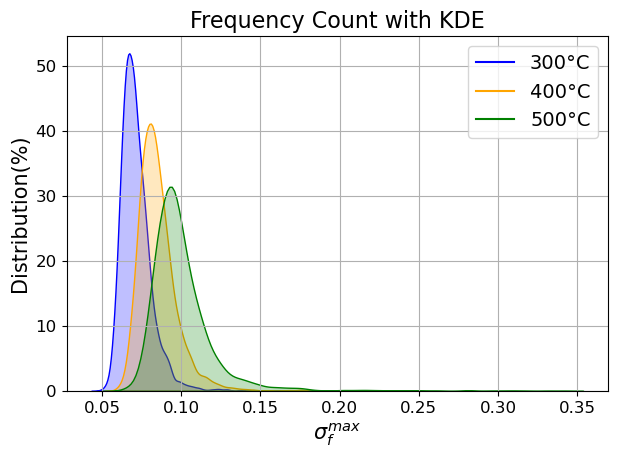

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read data from CSV file
file_path = '/home/jxhe/works/cnt/bakup/nano-new/cnt/training_info/demo/Max_Devi_F.dat'

data = np.loadtxt(file_path)

# 提取数据
data_300 = data[:, 0]
data_400 = data[:, 1]
data_500 = data[:, 2]




fig, ax = plt.subplots()

# 用 seaborn 画带有 KDE 的频率图，并且取消自动图例
sns.kdeplot(data_300, shade=True, label='_nolegend_', color='blue')
sns.kdeplot(data_400, shade=True, label='_nolegend_', color='orange')
sns.kdeplot(data_500, shade=True, label='_nolegend_', color='green')

# 手动添加图例
ax.legend(handles=[plt.Line2D([0], [0], color='blue', label='300°C'),
                   plt.Line2D([0], [0], color='orange', label='400°C'),
                   plt.Line2D([0], [0], color='green', label='500°C')],
          loc='upper right')

# 设置标签，标题
ax.set_ylabel('Distribution(%)', fontsize=15)
ax.set_xlabel('$\sigma_{f}^{max}$', fontsize=15)
ax.set_title('Frequency Count with KDE', fontsize=16)

# 设置刻度字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 显示图像
plt.tight_layout()
ax.grid(True)
plt.show()

# 保存图像
fig.savefig('temperature_histogram.svg', format='svg',transparent=True)

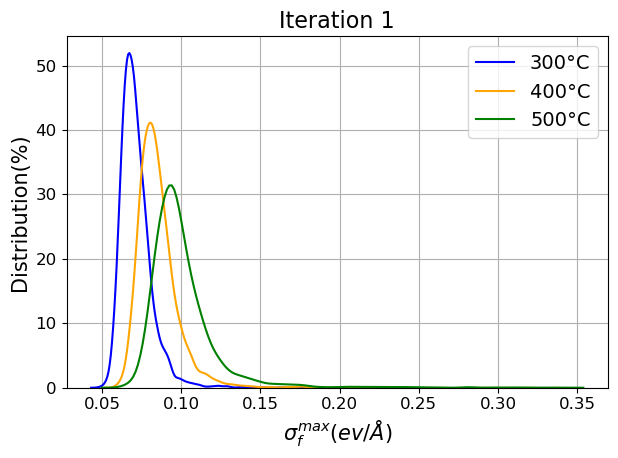

In [36]:
fig, ax = plt.subplots()

# # 将边框颜色设为黑色并加粗
# for spine in ax.spines.values():
#     spine.set_color('black')
#     spine.set_linewidth(1.15)

# # 将刻度线和刻度标签设为黑色并加粗
# ax.tick_params(colors='black', width=1.25)

# 使用 seaborn 画 KDE 图，并且取消自动图例，同时禁止填充
sns.kdeplot(data_300, label='_nolegend_', color='blue')
sns.kdeplot(data_400, label='_nolegend_', color='orange')
sns.kdeplot(data_500, label='_nolegend_', color='green')

# 手动添加图例
ax.legend(handles=[plt.Line2D([0], [0], color='blue', label='300°C'),
                   plt.Line2D([0], [0], color='orange', label='400°C'),
                   plt.Line2D([0], [0], color='green', label='500°C')],
          loc='upper right')

# 设置标签，标题
ax.set_ylabel('Distribution(%)', fontsize=15)
ax.set_xlabel(r'$\sigma_{f}^{max} (ev/Å)$', fontsize=15)
ax.set_title('Iteration 1', fontsize=16)

# 设置刻度字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 显示图像
plt.tight_layout()
ax.grid(True)
plt.show()

# 保存图像
fig.savefig('Iteration 1.svg', format='svg',transparent=True)

# model

# 大图

/tmp/ipykernel_130503/1841941322.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


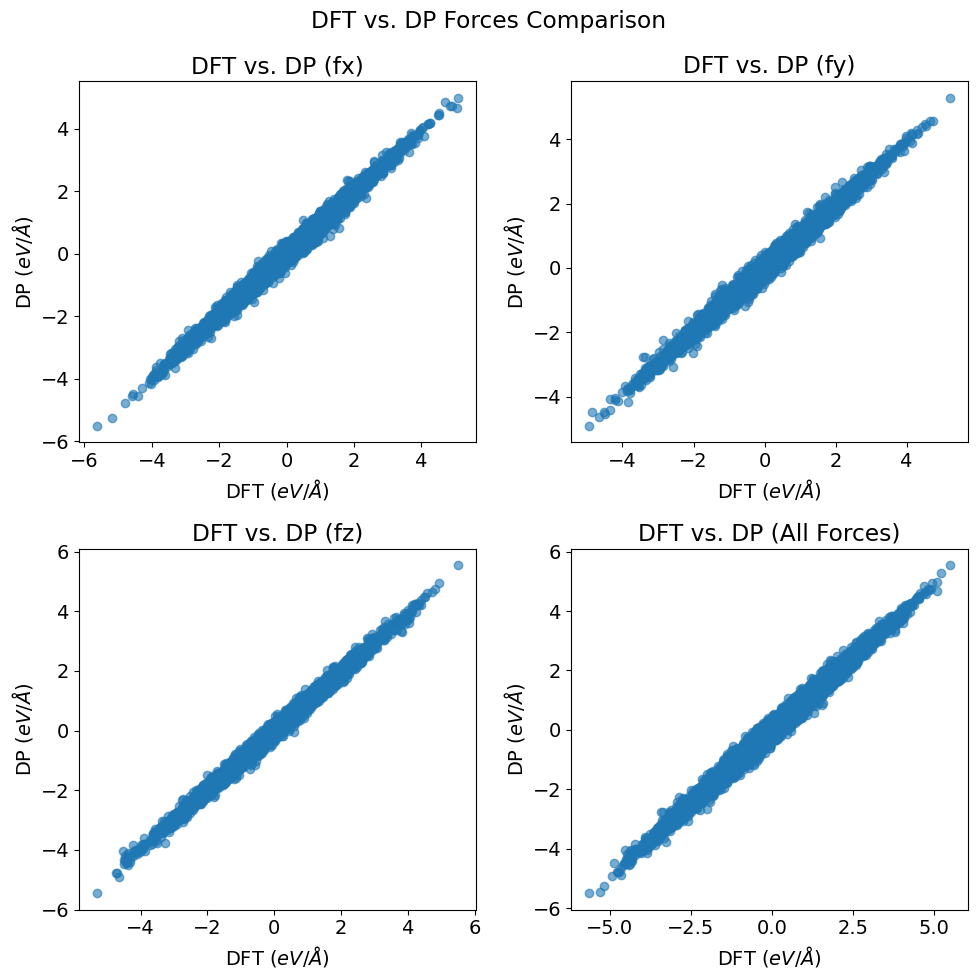

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
test_file = '/home/jxhe/works/cnt/bakup/nano-new/cnt/dpgen/iter.000029/00.train/000/DP_DFT_000_065.f.out'
data_array = np.loadtxt(test_file, skiprows=1)
data = pd.DataFrame(data_array, columns=['DFT_fx', 'DFT_fy', 'DFT_fz', 'DP_fx', 'DP_fy', 'DP_fz'])

# 设置大图的样式
fig, axes = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
fig.suptitle('DFT vs. DP Forces Comparison')

components = ['fx', 'fy', 'fz', 'Force']
ax_mapping = {0: axes[0, 0], 1: axes[0, 1], 2: axes[1, 0], 3: axes[1, 1]}

common_color = 'C0'  # 定义一个共同的颜色

# 绘制子图
for i, comp in enumerate(components):
    ax = ax_mapping[i]
    if comp == 'All Forces':
        ax.scatter(data['DFT_fx'], data['DP_fx'], color=common_color, alpha=0.6)
        ax.scatter(data['DFT_fy'], data['DP_fy'], color=common_color, alpha=0.6)
        ax.scatter(data['DFT_fz'], data['DP_fz'], color=common_color, alpha=0.6)
    else:
        ax.scatter(data[f'DFT_{comp}'], data[f'DP_{comp}'], color=common_color, alpha=0.6)
    
    ax.set_title(f'DFT vs. DP ({comp})')
    ax.set_xlabel('DFT $(eV/Å)$')
    ax.set_ylabel('DP $(eV/Å)$')
#     ax.legend()

# 保存图为SVG格式，背景透明
plt.tight_layout()
plt.savefig('forces_comparison_big.svg', format='svg', transparent=True)
plt.show()

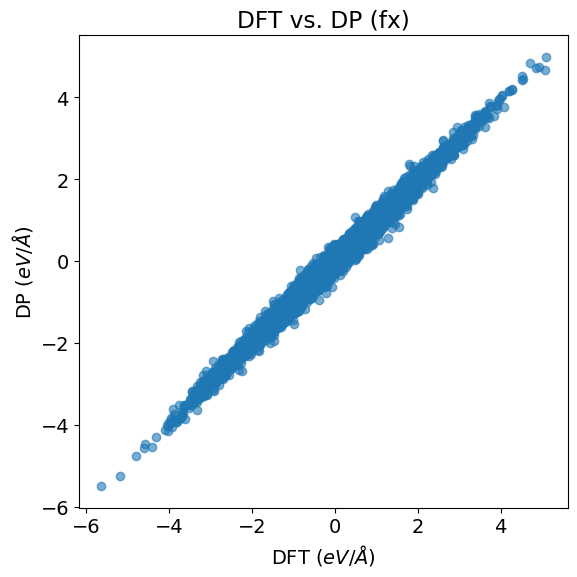

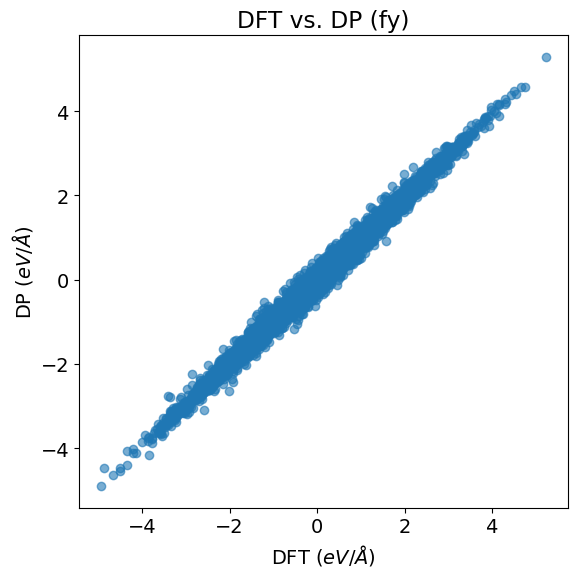

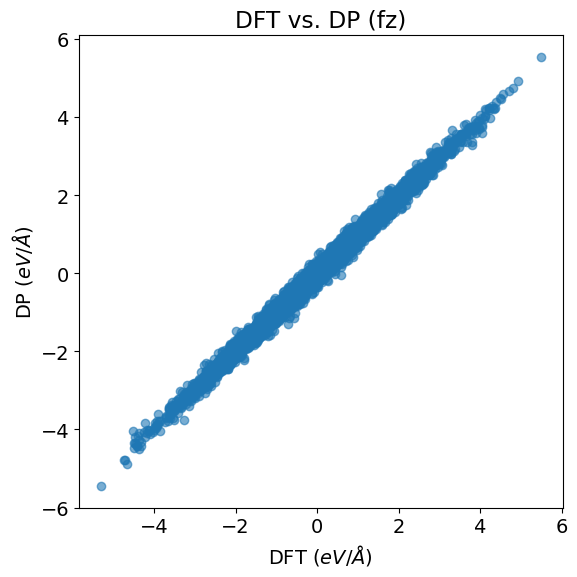

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
test_file = '/home/jxhe/works/cnt/bakup/nano-new/cnt/dpgen/iter.000029/00.train/000/DP_DFT_000_065.f.out'
data_array = np.loadtxt(test_file, skiprows=1)
data = pd.DataFrame(data_array, columns=['DFT_vxx', 'DFT_vxy', 'DFT_vxz','DFT_vyx', 'DFT_vyy', 'DFT_vyz','DFT_vzx', 'DFT_vzy', 'DFT_vzz', 'DP_vxx', 'DP_vxy', 'DP_vxz','DP_vyx', 'DP_vyy', 'DP_vyz','DP_vzx', 'DP_vzy', 'DP_vzz'])

# 设置力量分量和对应的标题
components = ['fx', 'fy', 'fz']
titles = ['DFT vs. DP (fx)', 'DFT vs. DP (fy)', 'DFT vs. DP (fz)']

for i, comp in enumerate(components):
    # 创建单独的子图
    plt.figure(figsize=(6, 6))
    
    plt.scatter(data[f'DFT_{comp}'], data[f'DP_{comp}'], color='C0', alpha=0.6)
    plt.title(titles[i])
    plt.xlabel('DFT $(eV/Å)$')
    plt.ylabel('DP $(eV/Å)$')
    
    # 保存图为SVG格式，背景透明
    plt.tight_layout()
    plt.savefig(f'force_comparison_{comp}.svg', format='svg', transparent=True)
    plt.show()


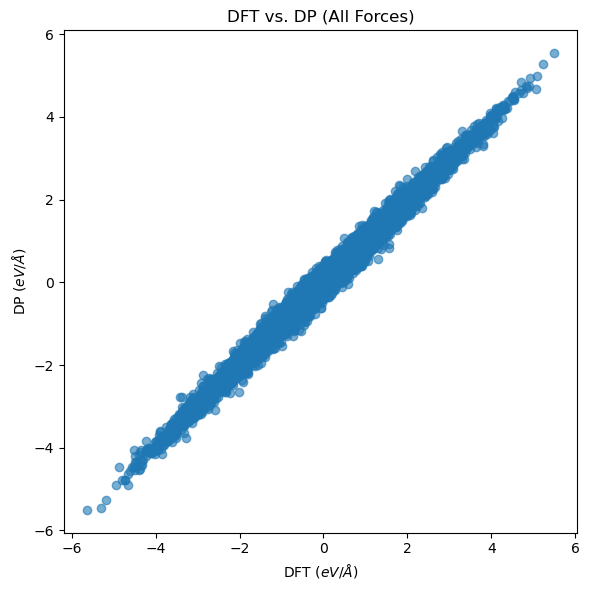

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
test_file = '/home/jxhe/works/cnt/bakup/nano-new/cnt/dpgen/iter.000029/00.train/000/DP_DFT_000_065.f.out'
data_array = np.loadtxt(test_file, skiprows=1)
data = pd.DataFrame(data_array, columns=['DFT_fx', 'DFT_fy', 'DFT_fz', 'DP_fx', 'DP_fy', 'DP_fz'])

# 创建单独的子图
plt.figure(figsize=(6, 6))

# 绘制 "All Forces" 的比较
plt.scatter(data['DFT_fx'], data['DP_fx'], color='C0', alpha=0.6)
plt.scatter(data['DFT_fy'], data['DP_fy'], color='C0', alpha=0.6)
plt.scatter(data['DFT_fz'], data['DP_fz'], color='C0', alpha=0.6)

plt.title('DFT vs. DP (All Forces)')
plt.xlabel('DFT $(eV/Å)$')
plt.ylabel('DP $(eV/Å)$')
# plt.legend()

# 保存图为SVG格式，背景透明
plt.tight_layout()
plt.savefig('force_comparison_all.svg', format='png', dpi=600, transparent=True)
plt.show()

In [71]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # 读取数据
# test_file = '/home/jxhe/works/cnt/bakup/nano-new/cnt/dpgen/iter.000029/00.train/000/DP_DFT_000_065.v.out'
# data_array = np.loadtxt(test_file, skiprows=1)
# data = pd.DataFrame(data_array, columns=[
#     'DFT_vxx', 'DFT_vxy', 'DFT_vxz',
#     'DFT_vyx', 'DFT_vyy', 'DFT_vyz',
#     'DFT_vzx', 'DFT_vzy', 'DFT_vzz',
#     'DP_vxx', 'DP_vxy', 'DP_vxz',
#     'DP_vyx', 'DP_vyy', 'DP_vyz',
#     'DP_vzx', 'DP_vzy', 'DP_vzz'
# ])

# # 创建单独的子图
# plt.figure(figsize=(6, 6))

# # 绘制所有DFT的散点
# for comp in components:
#     plt.scatter(data[f'DFT_{comp}'], data[f'DP_{comp}'], label=f'DFT {comp}', alpha=0.6)

# plt.title('DFT vs. DP (All Velocity Components)')
# plt.xlabel('DFT $(eV/Å)$')
# plt.ylabel('DP $(eV/Å)$')
# plt.legend()

# # 保存图为SVG格式，背景透明
# plt.tight_layout()
# plt.savefig('velocity_comparison_all_DFT.svg', format='svg', transparent=True)
# plt.show()


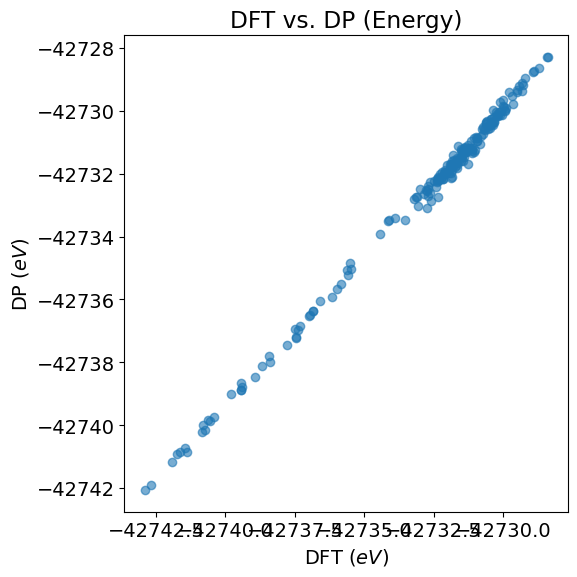

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
test_file = '/home/jxhe/works/cnt/bakup/nano-new/cnt/dpgen/iter.000029/00.train/001/DP_DFT_000_065.e.out'
data_array = np.loadtxt(test_file, skiprows=1)
data = pd.DataFrame(data_array, columns=['DFT_e', 'DP_e'])

# 创建单独的子图
plt.figure(figsize=(6, 6))

# 绘制 "All Forces" 的比较
plt.scatter(data['DFT_e'], data['DP_e'], color='C0', alpha=0.6)


plt.title('DFT vs. DP (Energy)')
plt.xlabel('DFT $(eV)$')
plt.ylabel('DP $(eV)$')
# plt.legend()

# 保存图为SVG格式，背景透明
plt.tight_layout()
plt.savefig('energy_comparison_all.svg', format='svg', transparent=True)
plt.show()